In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# %load MMHP_testing_ODE_medical.py
# Putting data into correct format for MMHP processing 

from classes_skeleton import *
from Learning_MLE_ODE_medical import *
import numpy as np
import pandas as pd 

D = 1 # dimension of Hawkes process (only one type of event, C. diff positive)

# --------------------------------------------------------------------
# Creating Seqs: df_one (df_one_Seqs)
# --------------------------------------------------------------------
df_one = pd.read_csv('data/event_times_ond_d_1314_ds0_one.csv')

df_one_num_units = df_one['unit'].nunique()
df_one_sorted = df_one.sort_values(by=['unit', 'time'])
df_one_grouped = df_one_sorted.groupby(['unit'])
df_one_grouped_list = list(df_one_grouped)

df_one_Seqs = [None] * df_one_num_units
for n in range(df_one_num_units):
	Seqs_n = Sequence()
	time_list = np.asarray(df_one_grouped_list[n][1]['time'])
	Seqs_n.Time = np.reshape(time_list, (1, time_list.shape[0]))
	#Seqs_n.Mark = np.ones((1, Seqs_n.Time.shape[1]), dtype=int) # because D = 1
	Seqs_n.Mark = np.zeros((1, Seqs_n.Time.shape[1]), dtype=int) # because D = 1
	Seqs_n.Start = np.min(Seqs_n.Time)
	Seqs_n.Stop = np.max(Seqs_n.Time)
	df_one_Seqs[n] = Seqs_n

df_one_unit_names = []
for tup in df_one_grouped_list:
	df_one_unit_names.append(tup[0])

'''
# Testing
print(df_one_Seqs[0].Time)
print(df_one_Seqs[0].Time.shape)
print("-------------------")
print(df_one_Seqs[0].Mark)
print(df_one_Seqs[0].Mark.shape)
print("-------------------")
print(df_one_Seqs[0].Start)
print("-------------------")
print(df_one_Seqs[0].Stop)
print(len(df_one_Seqs)) # should be 41
'''

# --------------------------------------------------------------------
# Creating Seqs: df_all (df_all_Seqs)
# --------------------------------------------------------------------
df_all = pd.read_csv('data/event_times_ond_d_1314_ds0_all.csv')

df_all_num_units = df_all['unit'].nunique()
df_all_sorted = df_all.sort_values(by=['unit', 'time'])
df_all_grouped = df_all_sorted.groupby(['unit'])
df_all_grouped_list = list(df_all_grouped)

df_all_Seqs = [None] * df_all_num_units
for n in range(df_all_num_units):
	Seqs_n = Sequence()
	time_list = np.asarray(df_all_grouped_list[n][1]['time'])
	Seqs_n.Time = np.reshape(time_list, (1, time_list.shape[0]))
	Seqs_n.Mark = np.zeros((1, Seqs_n.Time.shape[1]), dtype=int) # because D = 1
	Seqs_n.Start = np.min(Seqs_n.Time)
	Seqs_n.Stop = np.max(Seqs_n.Time)
	df_all_Seqs[n] = Seqs_n

df_all_unit_names = []
for tup in df_all_grouped_list:
	df_all_unit_names.append(tup[0])

'''
# Testing
print(df_all_Seqs[0].Time)
print(df_all_Seqs[0].Time.shape)
print("-------------------")
print(df_all_Seqs[0].Mark)
print(df_all_Seqs[0].Mark.shape)
print("-------------------")
print(df_all_Seqs[0].Start)
print("-------------------")
print(df_all_Seqs[0].Stop)
print(len(df_all_Seqs)) # should be 41
'''

# --------------------------------------------------------------------
# Instantiating parameters for Learning_MLE_ODE_medical.py
# Alpha: D x model.D x D = 1 x 41 x 1 (paper: D^2-by-units = 1x41)
# mu: D x 1 = 1 x 1 (paper:  D-by-U = 1x41) --> TODO: resolve difference
# g: M x model.D = M x 41
# --------------------------------------------------------------------
# Setting model
model = Model()
model.M = 1000 # number of samples of g
model.D = df_one_num_units # or, equivalently, df_all_num_units 
model.dt = 0.02 # sampling interval
model.g = np.matlib.rand(model.M, model.D)
model.g = model.g / np.tile(np.sum(model.g), (model.M, 1))
model.A = np.random.rand(D, model.D, D) / (model.D * D**2)
model.mu = np.matlib.rand(D, 1) / D

# Setting alg
alg = Algorithm()
alg.alpha = 10000
alg.inner = 3
alg.inner_g = 100
alg.outer = 8
#alg.thres = 1e-5
alg.Tmax = np.empty((0,0))

# --------------------------------------------------------------------
# Running for df_one
# --------------------------------------------------------------------
df_one_output = Learning_MLE_ODE_medical(df_one_Seqs, model, alg)
Alpha_one, mu_one, g_one, NLL_one = df_one_output 
print("Outputted Alpha (one):", Alpha_one)
print("Outputted Alpha shape (one):", Alpha_one.shape)

print("Outputted mu (one):", mu_one)
print("Outputted mu shape (one):", mu_one.shape)

print("Outputted g (one):", g_one)
print("Outputted g shape (one):", g_one.shape)

print("Outputted NLL (one):", NLL_one)
#print(df_one_output)

# --------------------------------------------------------------------
# Running for df_all
# --------------------------------------------------------------------
df_all_output = Learning_MLE_ODE_medical(df_all_Seqs, model, alg)
Alpha_all, mu_all, g_all, NLL_all = df_all_output 
print("Outputted Alpha (all):", Alpha_all)
print("Outputted Alpha shape (all):", Alpha_all.shape)

print("Outputted mu (all):", mu_all)
print("Outputted mu shape (all):", mu_all.shape)

print("Outputted g (all):", g_all)
print("Outputted g shape (all):", g_all.shape)

print("Outputted NLL (all):", NLL_all)
#print(df_one_output)

Outer=0, Inner=0, Objective=[[11314.17945981]], RelErr=0.9899611219457923
Outer=0, Inner=1, Objective=[4139.11666606], RelErr=0.8851238965696525
Outer=0, Inner=2, Objective=[4135.17609373], RelErr=0.8777124750144139
Outer=1, Inner=0, Objective=[4134.7271867], RelErr=0.8777927141541517
Outer=1, Inner=1, Objective=[4134.67230678], RelErr=0.8773540332677846
Outer=1, Inner=2, Objective=[4134.66560342], RelErr=0.877016735800011
Outer=2, Inner=0, Objective=[4134.66478163], RelErr=0.8753870564313553
Outer=2, Inner=1, Objective=[4134.66468072], RelErr=0.8750676423039849
Outer=2, Inner=2, Objective=[4134.66466815], RelErr=0.8747521848115551
Outer=3, Inner=0, Objective=[4134.66466658], RelErr=0.8743924894423896
Outer=3, Inner=1, Objective=[4134.66466638], RelErr=0.8740844349522382
Outer=3, Inner=2, Objective=[4134.66466635], RelErr=0.8737801381425951
Outer=4, Inner=0, Objective=[4134.66466635], RelErr=0.8734792852836537
Outer=4, Inner=1, Objective=[4134.66466635], RelErr=0.873182547193426
Outer=

## Infectivity (Alpha) plots

#### event_times_ond_d_1314_ds0_one.csv (d_one)

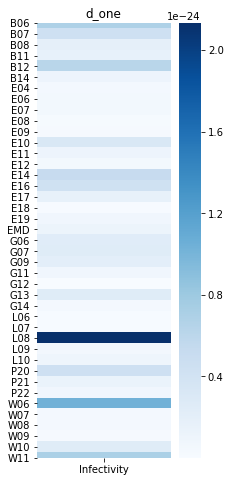

In [26]:
Alpha_one_plot = Alpha_one.flatten()
df_one_infectivity = pd.DataFrame(Alpha_one_plot, index=df_one_unit_names, columns=['Infectivity'])

plt.figure(figsize=(3,8))
sns.heatmap(df_one_infectivity, cmap="Blues")
plt.title('d_one')
plt.show()

#### event_times_ond_d_1314_ds0_all.csv (d_all)

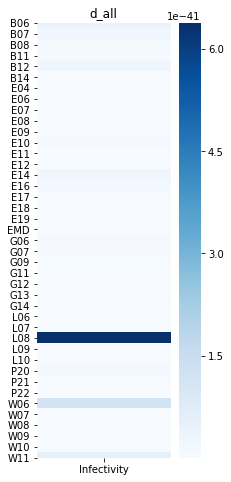

In [29]:
Alpha_all_plot = Alpha_all.flatten()
df_all_infectivity = pd.DataFrame(Alpha_all_plot, index=df_all_unit_names, columns=['Infectivity'])

plt.figure(figsize=(3,8))
sns.heatmap(df_all_infectivity, cmap="Blues")
plt.title('d_all')
plt.show()

## NLL (negative log-likelihood) plots
Trying several values of model.M, model.dt, alg.alpha, alg.inner, alg.inner_g, alg.outer to minimize NLL

#### Varying model.M, on d_one dataset

In [54]:
def get_NLL_model_M(M_val):
    D = 1 #
    df_one = pd.read_csv('data/event_times_ond_d_1314_ds0_one.csv')
    df_one_num_units = df_one['unit'].nunique()
    df_one_sorted = df_one.sort_values(by=['unit', 'time'])
    df_one_grouped = df_one_sorted.groupby(['unit'])
    df_one_grouped_list = list(df_one_grouped)

    df_one_Seqs = [None] * df_one_num_units
    for n in range(df_one_num_units):
        Seqs_n = Sequence()
        time_list = np.asarray(df_one_grouped_list[n][1]['time'])
        Seqs_n.Time = np.reshape(time_list, (1, time_list.shape[0]))
        #Seqs_n.Mark = np.ones((1, Seqs_n.Time.shape[1]), dtype=int) # because D = 1
        Seqs_n.Mark = np.zeros((1, Seqs_n.Time.shape[1]), dtype=int) # because D = 1
        Seqs_n.Start = np.min(Seqs_n.Time)
        Seqs_n.Stop = np.max(Seqs_n.Time)
        df_one_Seqs[n] = Seqs_n
        
    # Setting model
    model = Model()
    model.M = M_val # number of samples of g, parameter to vary
    model.D = df_one_num_units # or, equivalently, df_all_num_units 
    model.dt = 0.02 # sampling interval
    model.g = np.matlib.rand(model.M, model.D)
    model.g = model.g / np.tile(np.sum(model.g), (model.M, 1))
    model.A = np.random.rand(D, model.D, D) / (model.D * D**2)
    model.mu = np.matlib.rand(D, 1) / D

    # Setting alg
    alg = Algorithm()
    alg.alpha = 10000
    alg.inner = 3
    alg.inner_g = 100
    alg.outer = 3
    #alg.thres = 1e-5
    alg.Tmax = np.empty((0,0))
    
    Alpha_one, mu_one, g_one, NLL_one = Learning_MLE_ODE_medical(df_one_Seqs, model, alg)
    return NLL_one

In [55]:
#model_M_vals = list(range(50, 1600, 100))
model_M_vals = list(range(100, 1600, 200))
model_M_NLL_vals = []

for M_val in model_M_vals:
    model_M_NLL_vals.append(get_NLL_model_M(M_val))
    
print("NLL values while varying model.M:", model_M_NLL_vals)

Outer=0, Inner=0, Objective=[[17697.55691765]], RelErr=0.9978438979186566
Outer=0, Inner=1, Objective=[4135.64914053], RelErr=0.9613959429606576
Outer=0, Inner=2, Objective=[4134.70267078], RelErr=0.9566852157316571
Outer=1, Inner=0, Objective=[4134.6663125], RelErr=0.9539600355311396
Outer=1, Inner=1, Objective=[4134.66474214], RelErr=0.9522541769290923
Outer=1, Inner=2, Objective=[4134.66466997], RelErr=0.951121136409545
Outer=2, Inner=0, Objective=[4134.66466653], RelErr=0.9502214479639272
Outer=2, Inner=1, Objective=[4134.66466636], RelErr=0.949631268756895
Outer=2, Inner=2, Objective=[4134.66466635], RelErr=0.9491715786754992
Outer=0, Inner=0, Objective=[[18948.65611731]], RelErr=0.995450179517269
Outer=0, Inner=1, Objective=[4136.81144826], RelErr=0.9244806145737333
Outer=0, Inner=2, Objective=[4134.82678895], RelErr=0.9203148674903813
Outer=1, Inner=0, Objective=[4134.67758447], RelErr=0.9188989065168288
Outer=1, Inner=1, Objective=[4134.66571402], RelErr=0.9173927054319256
Oute

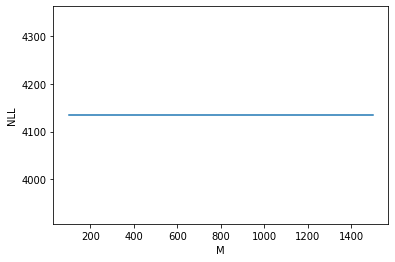

In [43]:
plt.plot(model_M_vals, model_M_NLL_vals)
plt.xlabel('M')
plt.ylabel('NLL')
plt.show()

#### Varying alg.outer, on d_one dataset

In [44]:
def get_NLL_alg_outer(alg_outer_val):
    D = 1 #
    df_one = pd.read_csv('data/event_times_ond_d_1314_ds0_one.csv')
    df_one_num_units = df_one['unit'].nunique()
    df_one_sorted = df_one.sort_values(by=['unit', 'time'])
    df_one_grouped = df_one_sorted.groupby(['unit'])
    df_one_grouped_list = list(df_one_grouped)

    df_one_Seqs = [None] * df_one_num_units
    for n in range(df_one_num_units):
        Seqs_n = Sequence()
        time_list = np.asarray(df_one_grouped_list[n][1]['time'])
        Seqs_n.Time = np.reshape(time_list, (1, time_list.shape[0]))
        #Seqs_n.Mark = np.ones((1, Seqs_n.Time.shape[1]), dtype=int) # because D = 1
        Seqs_n.Mark = np.zeros((1, Seqs_n.Time.shape[1]), dtype=int) # because D = 1
        Seqs_n.Start = np.min(Seqs_n.Time)
        Seqs_n.Stop = np.max(Seqs_n.Time)
        df_one_Seqs[n] = Seqs_n
        
    # Setting model
    model = Model()
    model.M = 1000 # number of samples of g
    model.D = df_one_num_units # or, equivalently, df_all_num_units 
    model.dt = 0.02 # sampling interval
    model.g = np.matlib.rand(model.M, model.D)
    model.g = model.g / np.tile(np.sum(model.g), (model.M, 1))
    model.A = np.random.rand(D, model.D, D) / (model.D * D**2)
    model.mu = np.matlib.rand(D, 1) / D

    # Setting alg
    alg = Algorithm()
    alg.alpha = 10000
    alg.inner = 3
    alg.inner_g = 100
    alg.outer = alg_outer_val # parameter to vary
    #alg.thres = 1e-5
    alg.Tmax = np.empty((0,0))
    
    Alpha_one, mu_one, g_one, NLL_one = Learning_MLE_ODE_medical(df_one_Seqs, model, alg)
    return NLL_one

In [45]:
alg_outer_vals = list(range(2, 14, 2))
alg_outer_NLL_vals = []

for alg_outer_val in alg_outer_vals:
    alg_outer_NLL_vals.append(get_NLL_alg_outer(alg_outer_val))
    
print("NLL values while varying alg.outer:", alg_outer_NLL_vals)

Outer=0, Inner=0, Objective=[[4661.39684337]], RelErr=0.9752003748012652
Outer=0, Inner=1, Objective=[4144.93536957], RelErr=0.8958244515738202
Outer=0, Inner=2, Objective=[4135.73461821], RelErr=0.8805826015999555
Outer=1, Inner=0, Objective=[4134.79237494], RelErr=0.8799519295397147
Outer=1, Inner=1, Objective=[4134.67999747], RelErr=0.879105794400273
Outer=1, Inner=2, Objective=[4134.66651979], RelErr=0.8784808623520777
Outer=0, Inner=0, Objective=[[5389.12294489]], RelErr=0.9822605590751222
Outer=0, Inner=1, Objective=[4143.18874914], RelErr=0.8919353780037453
Outer=0, Inner=2, Objective=[4135.58581499], RelErr=0.8787004969064299
Outer=1, Inner=0, Objective=[4134.77635088], RelErr=0.878258983081579
Outer=1, Inner=1, Objective=[4134.6782629], RelErr=0.8775181389612488
Outer=1, Inner=2, Objective=[4134.66633168], RelErr=0.8769769449436783
Outer=2, Inner=0, Objective=[4134.66487131], RelErr=0.8747187314146646
Outer=2, Inner=1, Objective=[4134.66469203], RelErr=0.874225375353894
Outer=

Outer=8, Inner=2, Objective=[4134.66466635], RelErr=0.869034084965107
Outer=9, Inner=0, Objective=[4134.66466635], RelErr=0.8686858180010889
Outer=9, Inner=1, Objective=[4134.66466635], RelErr=0.8683411159776612
Outer=9, Inner=2, Objective=[4134.66466635], RelErr=0.8680008562977223
Outer=10, Inner=0, Objective=[4134.66466635], RelErr=0.8676659085554334
Outer=10, Inner=1, Objective=[4134.66466635], RelErr=0.8673371185481834
Outer=10, Inner=2, Objective=[4134.66466635], RelErr=0.8670152933490262
Outer=11, Inner=0, Objective=[4134.66466635], RelErr=0.866701187869466
Outer=11, Inner=1, Objective=[4134.66466635], RelErr=0.8663954932660074
Outer=11, Inner=2, Objective=[4134.66466635], RelErr=0.8660988274517216
NLL values while varying alg.outer: [4134.666519787568, 4134.664666357598, 4134.664666351028, 4134.664666351028, 4134.664666351028, 4134.664666351028]


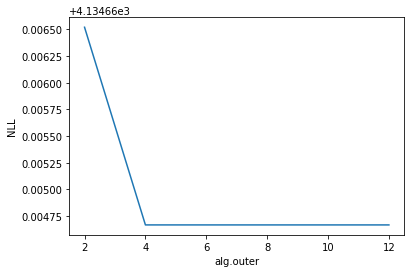

In [46]:
plt.plot(alg_outer_vals, alg_outer_NLL_vals)
plt.xlabel('alg.outer')
plt.ylabel('NLL')
plt.show()

#### Varying alg.alpha, on d_one dataset

In [51]:
def get_NLL_alg_alpha(alg_alpha_val):
    D = 1 #
    df_one = pd.read_csv('data/event_times_ond_d_1314_ds0_one.csv')
    df_one_num_units = df_one['unit'].nunique()
    df_one_sorted = df_one.sort_values(by=['unit', 'time'])
    df_one_grouped = df_one_sorted.groupby(['unit'])
    df_one_grouped_list = list(df_one_grouped)

    df_one_Seqs = [None] * df_one_num_units
    for n in range(df_one_num_units):
        Seqs_n = Sequence()
        time_list = np.asarray(df_one_grouped_list[n][1]['time'])
        Seqs_n.Time = np.reshape(time_list, (1, time_list.shape[0]))
        #Seqs_n.Mark = np.ones((1, Seqs_n.Time.shape[1]), dtype=int) # because D = 1
        Seqs_n.Mark = np.zeros((1, Seqs_n.Time.shape[1]), dtype=int) # because D = 1
        Seqs_n.Start = np.min(Seqs_n.Time)
        Seqs_n.Stop = np.max(Seqs_n.Time)
        df_one_Seqs[n] = Seqs_n
        
    # Setting model
    model = Model()
    model.M = 1000 # number of samples of g
    model.D = df_one_num_units # or, equivalently, df_all_num_units 
    model.dt = 0.02 # sampling interval
    model.g = np.matlib.rand(model.M, model.D)
    model.g = model.g / np.tile(np.sum(model.g), (model.M, 1))
    model.A = np.random.rand(D, model.D, D) / (model.D * D**2)
    model.mu = np.matlib.rand(D, 1) / D

    # Setting alg
    alg = Algorithm()
    alg.alpha = alg_alpha_val # parameter to vary
    alg.inner = 3
    alg.inner_g = 100
    alg.outer = 3
    #alg.thres = 1e-5
    alg.Tmax = np.empty((0,0))
    
    Alpha_one, mu_one, g_one, NLL_one = Learning_MLE_ODE_medical(df_one_Seqs, model, alg)
    return NLL_one

In [52]:
alg_alpha_vals = list(range(1000, 15000, 2000))
alg_alpha_NLL_vals = []

for alg_alpha_val in alg_alpha_vals:
    alg_alpha_NLL_vals.append(get_NLL_alg_alpha(alg_alpha_val))
    
print("NLL values while varying alg.outer:", alg_alpha_NLL_vals)

Outer=0, Inner=0, Objective=[[12496.73210346]], RelErr=0.9768483558334347
Outer=0, Inner=1, Objective=[4144.87744324], RelErr=0.8801137738232724
Outer=0, Inner=2, Objective=[4135.88903209], RelErr=0.8774683857762764
Outer=1, Inner=0, Objective=[4134.8144592], RelErr=0.8826719937012113
Outer=1, Inner=1, Objective=[4134.68224118], RelErr=0.881992393439075
Outer=1, Inner=2, Objective=[4134.66674031], RelErr=0.8813844009950083
Outer=2, Inner=0, Objective=[4134.66491271], RelErr=0.8748154871069725
Outer=2, Inner=1, Objective=[4134.66469719], RelErr=0.8742646739976659
Outer=2, Inner=2, Objective=[4134.66467023], RelErr=0.8737501373102802
Outer=0, Inner=0, Objective=[[10872.32599227]], RelErr=0.9833448788452441
Outer=0, Inner=1, Objective=[4142.64861671], RelErr=0.8826293310321726
Outer=0, Inner=2, Objective=[4135.60174558], RelErr=0.8781044113339096
Outer=1, Inner=0, Objective=[4134.77879933], RelErr=0.8803586895315241
Outer=1, Inner=1, Objective=[4134.67832134], RelErr=0.8798681827225019
Ou

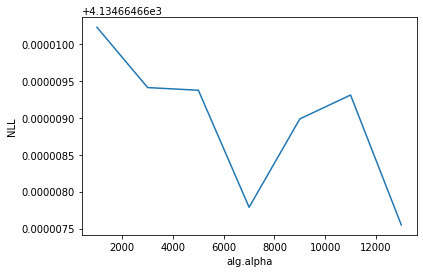

In [53]:
plt.plot(alg_alpha_vals, alg_alpha_NLL_vals)
plt.xlabel('alg.alpha')
plt.ylabel('NLL')
plt.show()